## Emerging Market and Inflation HW2

### Chenyu Zhao

### Q1 Discuss price and risk differences (corrections) for the non-standard settling NDFs compared to the standard one using market data provided in Appendix. Estimate present value correction for a set of Fixing Date to Settlement Date periods provided compared to the standard 2 days offset rule coinciding with Spot Date rule

#### Answer



$$
\frac{\text{PV}^{\text{MXN}}_{\text{non-standard}}}{\text{PV}^{\text{MXN}}_{\text{standard}}}=Z^{\text{MXN}}(T_{\text{fix}}+\text{spot date rate},T_{\text{fix}}+\text{settle date offset})=e^{-r\times\text{extra settle days}/365}
$$

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
exp_T = np.array(['2020-11-10', '2020-12-09','2021-01-05','2021-02-05','2021-05-05'])
extra_day = np.array([5, 34, 61, 92, 181])
MXN = np.array([0.06164, 0.06164, 0.06125, 0.06061, 0.05979])
ARS = np.array([0.40706, 0.40706, 0.3995, 0.38709, 0.37106])

In [12]:
Z_MXN = np.exp(-MXN * extra_day / 365.0)
Z_MXN

array([0.99915597, 0.99427464, 0.98981591, 0.98483906, 0.97078594])

##### The correction is decreasing

### Q2 Make some numerical estimates of the Convexity Adjustment in Forward Starting NDF using market data provided. Argue the validity limits

#### Answer

In [14]:
spot = 3.75
multi = 10000
notional = 1000000

# tau / forward point / discount factor / strike offset / forward
strike_set = np.array([1, 4500, 0.994, 2300, 4.20])
expiry = np.array([2, 6800, 0.981, np.nan, 4.43])



$$
\mathbb{E}\left[\frac{S(T)}{S(T)+\Delta S}\right]=1-\frac{\Delta S}{F(T)+\Delta S}\exp((\frac{F(T)}{F(T)+\Delta S})^2\sigma^2T)
$$

and 
$$
\text{ADJ}=\exp((\frac{F(T)}{F(T)+\Delta S})^2\sigma^2T)
$$

In [15]:
sigma = np.arange(0,0.5,0.02)
deltaS = 0.23
F = 4.2

adj =  np.exp((F / (F + deltaS))**2 * sigma ** 2 * F) 
res= 1 - deltaS / (deltaS + F)*adj
res_series = pd.Series(res)
delta_res = res_series.pct_change()

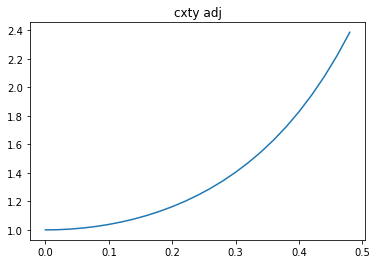

In [16]:
plt.title("cxty adj")
plt.plot(sigma, adj)
plt.show()

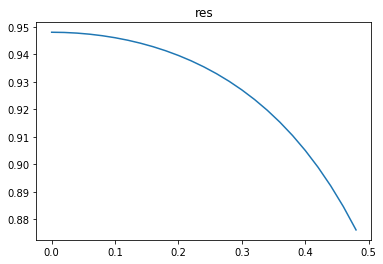

In [17]:
plt.title("res")
plt.plot(sigma, res)
plt.show()

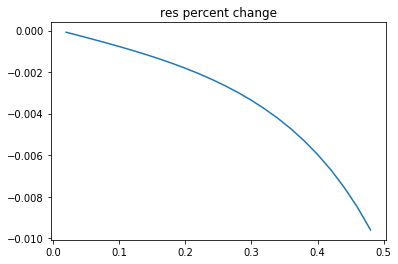

In [18]:
plt.title("res percent change")
plt.plot(sigma, delta_res)
plt.show()

When sigma is small, the convexity adjustment is not significant. But when sigma increase, the adjustment can not be neglected. This is because adjustment is proportional to $e^{\beta^2}$

### Q3 FFT: How much risk can we allow to bleed here? How much of a residual PnL will be lost due to this hedging inefficiency?

#### answer

The true convexity adjustment should be around 10 to 100 basis points, however, in the model, it is sensitive to correlation, when correlation is large and approach 1. In practice, it can be neglected.